# Лабораторная работа 5.5. Компьютерная сцинтилляционная $\gamma$-спектрометрия.

In [12]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

%matplotlib inline
sns.set()

## Введение
Любой спектр, получаемый с помощью гамма-спектрометра, описывается несколькими компонентами, каждая из которых связана с определенным физическим процессом:

1) Фотоэффект: $ T_e = E_{\gamma} - I_i $

2) Эффект Комптона: $ E_{max}=\frac{\mu\omega}{1+\frac{mc^2}{2\mu\omega}} $

3) Образование электрон-позитронных пар: $ E = E_{\gamma}, E = E_{\gamma} - E_0, E =  E_{\gamma} - 2E_0 $


Помимо этих процессов, добавляются экспонента, связанная с наличием
фона, пик характеристического излучения, возникающий при взаимодействии гамма-квантов с окружающим веществом, а также пик обратного рассеяния, образующийся при энергии квантов $Е_\gamma \gg \frac{mc^2}{2}$ в результате рассеяния
гамма-квантов на большие углы на материалах конструктивных элементов
детектора и защиты. Положение пика обратного рассеяния определяется по
формуле: $ E_{обр}=\frac{E}{1+\frac{2E}{mc^2}} $


## Считывание данных и первичная обработка

In [13]:
# Считывание данных.
data = {"22Na":None, "60Co":None, "137Cs":None, "152Eu":None, "241Am":None, "Noise":None}
for element in data:
    data[element] = pd.read_excel(element + ".xlsx")

In [14]:
# Рассчёт ошибки числа частиц.
# Число зарегистрированных частиц распределен по Пуассону.
# Поэтому ошибка есть корень из числа частиц.
for element in data:
    data[element]["Error"] = np.sqrt(data[element]["Counts"])

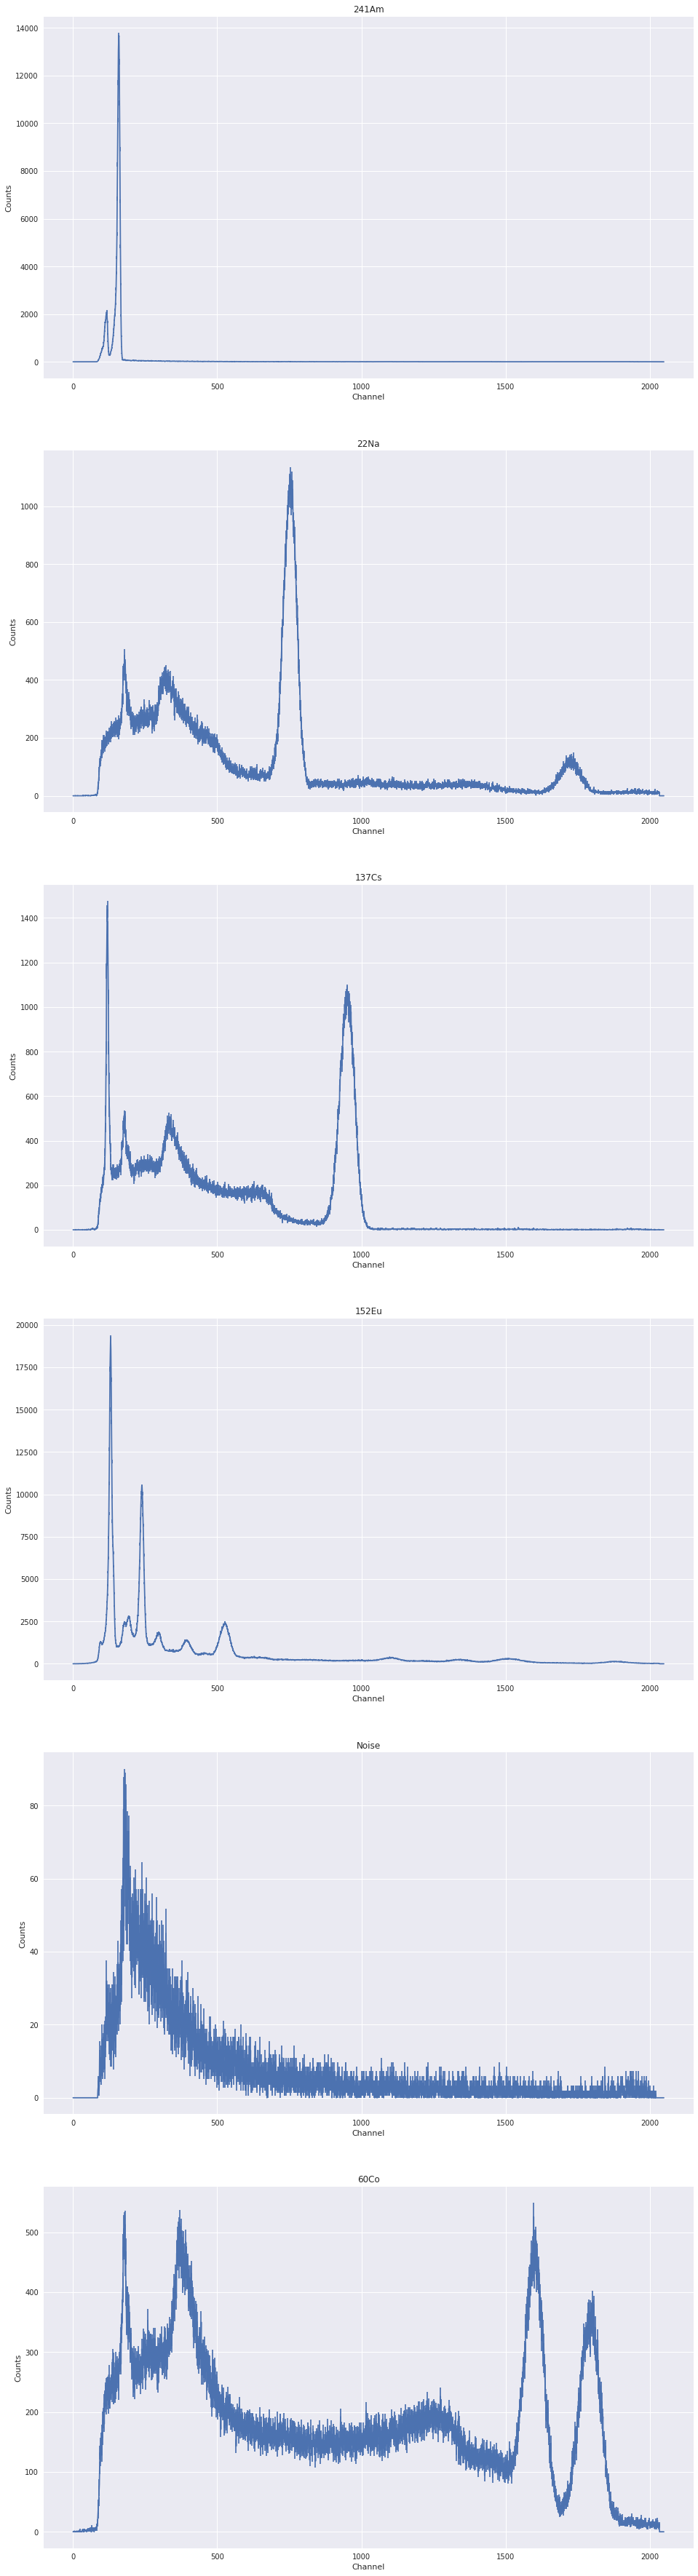

In [15]:
# Визуализация данных.
fig, axes = plt.subplots(6, 1, figsize=(16, 64))
fig_num = 0
for element in data:
    X = data[element]["Channel"]
    Y = data[element]["Counts"]
    Y_err = data[element]["Error"]
    axes[fig_num].errorbar(X, Y, yerr=Y_err)
    axes[fig_num].set_title(element)
    axes[fig_num].set_xlabel("Channel")
    axes[fig_num].set_ylabel("Counts")
    fig_num += 1

In [16]:
# Функции для фитирования.
gauss = lambda x, a, mu, sigma: a*np.exp(-(x-mu)**2/sigma)
exponent = lambda x, alpha, beta, _: alpha*np.exp(-beta*x)

# Фитирование пиков полного поглощения и подложки.
def fit_plot(data, function, inter, axes, title, p0=None):
    pval, pcov = curve_fit(f=function, xdata=data["Channel"][inter[0]:inter[1]],
                           ydata=data["Counts"][inter[0]:inter[1]], p0=p0)
    axes.set_xlabel("Channel")
    axes.set_ylabel("Counts")
    axes.set_title(title)
    axes.errorbar(data["Channel"], data["Counts"])
    axes.plot(np.linspace(inter[0], inter[1], 1000),
              function(np.linspace(inter[0], inter[1], 1000),
                       pval[0], pval[1], pval[2]), "o")
    return pval, np.diag(pcov)

/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


{'137Cs': [array([1037.50817075,  950.6682534 , 1330.54793416]),
  array([2.92600585e+01, 2.41778529e-02, 3.12985672e+02])],
 '152Eu': [array([10111.08652819,   239.03181928,   115.63035685]),
  array([1.09577564e+04, 8.37000685e-03, 9.34256310e+00]),
  array([17147.88495477,   131.04709348,    70.61261934]),
  array([3.14432237e+05, 5.01348057e-02, 3.11703669e+01])],
 '22Na': [array([ 115.13927846, 1723.42907584, 2876.77996792]),
  array([1.56722973e+00, 2.27089940e-01, 6.23776827e+03]),
  array([1059.02557212,  752.82583695, 1124.02893042]),
  array([2.81240117e+01, 1.87564878e-02, 1.90869391e+02])],
 '241Am': [array([13541.68664907,   158.9762493 ,    37.01960353]),
  array([3.94080108e+04, 5.32848585e-03, 1.71396077e+00])],
 '60Co': [array([ 454.19973263, 1597.72993411, 2672.20098781]),
  array([8.17542079e+00, 7.46051333e-02, 2.06535164e+03]),
  array([ 353.58389453, 1791.71727146, 2821.50014606]),
  array([5.67434258e+00, 8.67933719e-02, 2.34914315e+03])],
 'Noise': [array([1.199

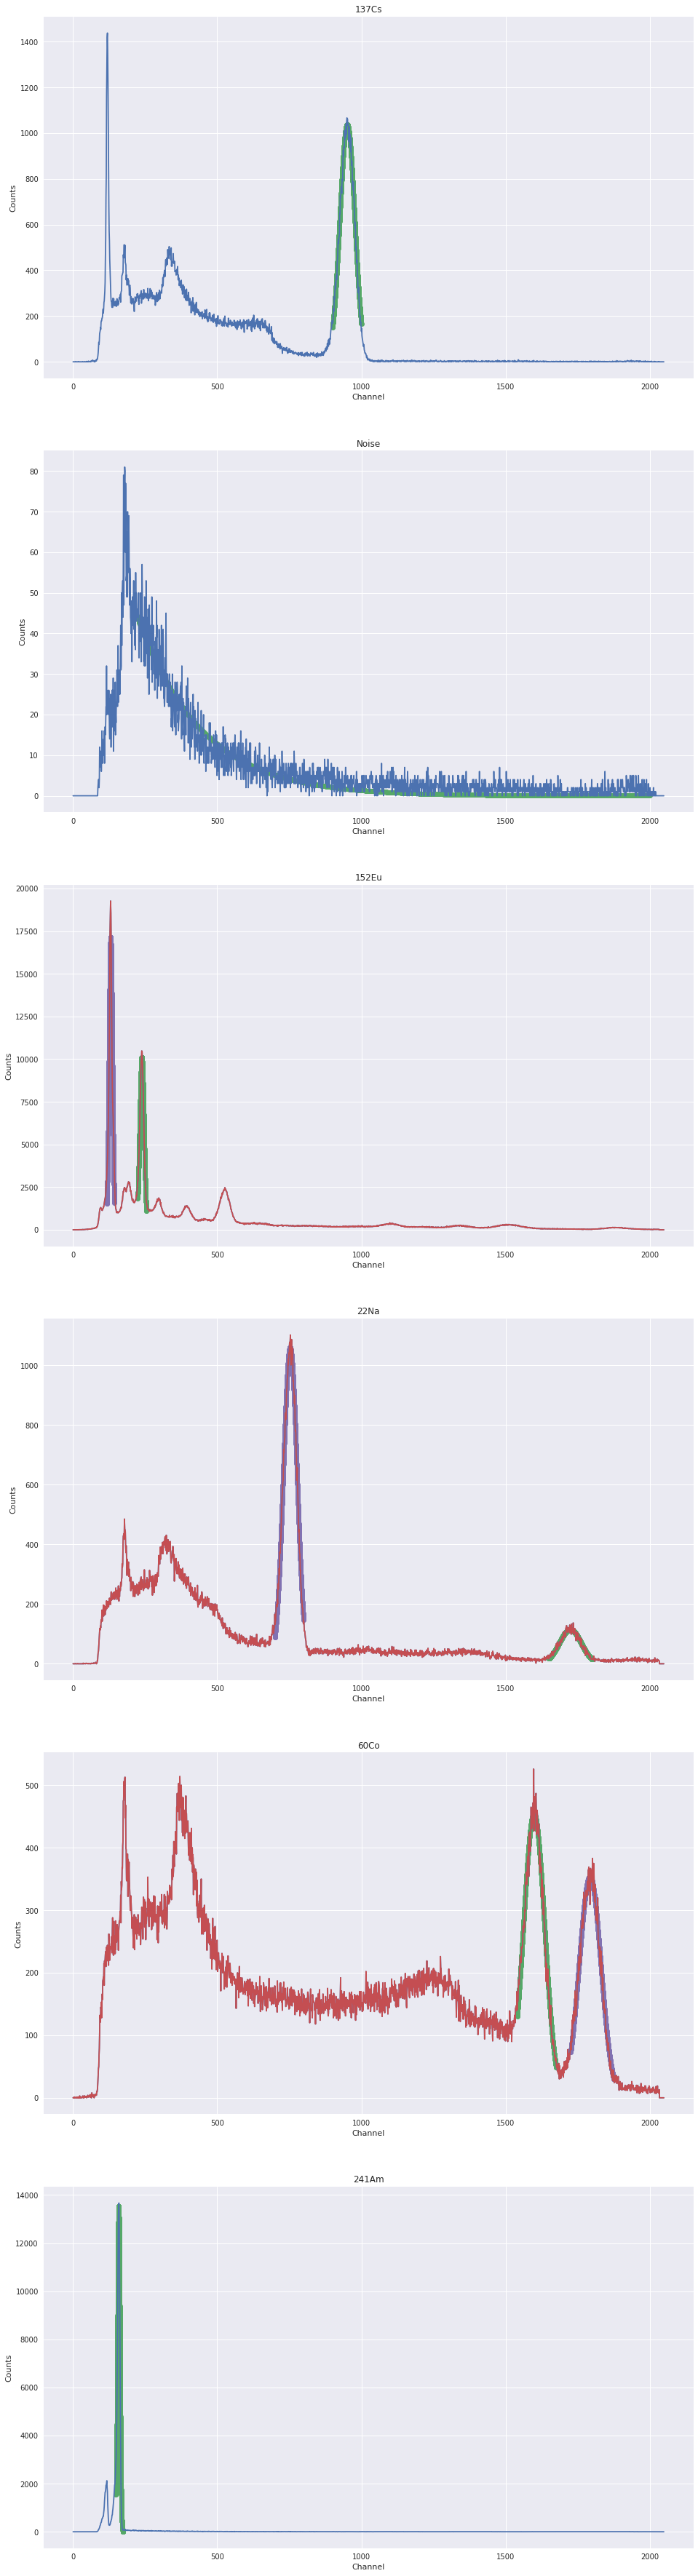

In [17]:
fig, axes = plt.subplots(6, 1, figsize=(16, 64))
params = {"22Na":[], "60Co":[], "137Cs":[], "152Eu":[], "241Am":[], "Noise":[]}
params["137Cs"]+=fit_plot(data["137Cs"], gauss,
                          [900, 1000], axes[0], "137Cs", p0=[900, 900, 900])
params["Noise"]+=fit_plot(data["Noise"], exponent,
                          [220, 2000], axes[1], "Noise", p0=[160, 0.006, 0])
params["152Eu"]+=fit_plot(data["152Eu"], gauss,
                          [225, 255], axes[2], "152Eu", p0=[520, 230, 30])
params["152Eu"]+=fit_plot(data["152Eu"], gauss,
                          [118, 144], axes[2], "152Eu", p0=[520, 125, 30])
params["22Na"]+=fit_plot(data["22Na"], gauss,
                         [1650, 1800], axes[3], "22Na", p0=[500, 1700, 500])
params["22Na"]+=fit_plot(data["22Na"], gauss,
                         [700, 800], axes[3], "22Na", p0=[500, 750, 500])
params["60Co"]+=fit_plot(data["60Co"], gauss,
                         [1540, 1675], axes[4], "60Co", p0=[500, 1600, 100])
params["60Co"]+=fit_plot(data["60Co"], gauss,
                         [1725, 1875], axes[4], "60Co", p0=[500, 1800, 100])
params["241Am"]+=fit_plot(data["241Am"], gauss,
                          [150, 175], axes[5], "241Am", p0=[500, 160, 50])
params

{'137Cs': [array([ 456.39687371,  340.17568776, 3400.0599548 ]),
  array([1.48298866e+01, 2.45466319e-01, 2.24088150e+04])],
 '22Na': [array([ 380.17038767,  331.96145394, 9182.89816101]),
  array([1.61622040e+01, 1.50982317e+00, 4.35109204e+05])],
 '60Co': [array([ 451.45528952,  382.46022346, 7666.42845211]),
  array([1.54121342e+01, 5.73251933e-01, 1.14200473e+05])]}

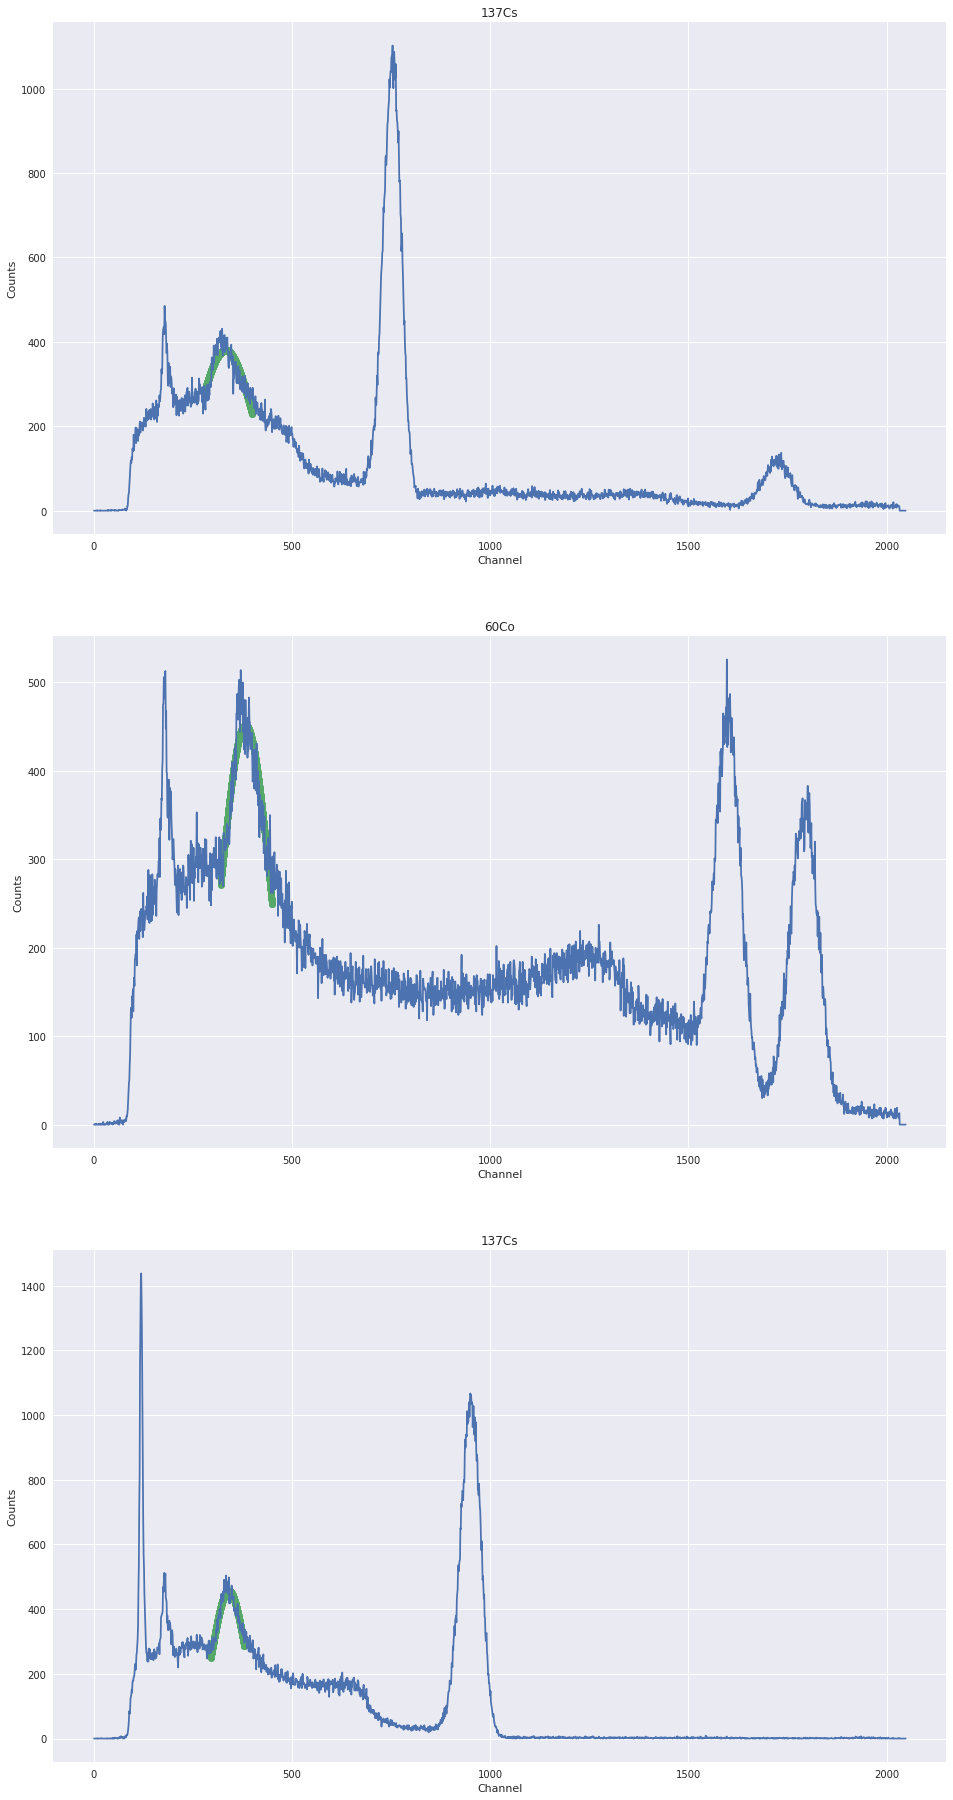

In [18]:
# Фитирование пиков обратного рассеивания
fig, axes = plt.subplots(3, 1, figsize=(16, 32))
params_rev = {"22Na":[], "60Co":[], "137Cs":[]}
params_rev["22Na"] += fit_plot(data["22Na"], gauss,
                          [280, 400], axes[0], "137Cs", p0=[900, 350, 30])
params_rev["60Co"] += fit_plot(data["60Co"], gauss,
                          [320, 450], axes[1], "60Co", p0=[900, 350, 30])
params_rev["137Cs"] += fit_plot(data["137Cs"], gauss,
                          [295, 380], axes[2], "137Cs", p0=[900, 350, 30])
params_rev

## Обработка результатов

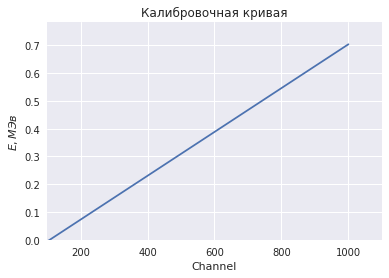

In [26]:
# Построение калибровочной кривой.
E_table = [0.511, 1.275, 0.662]
N_chan = [params["22Na"][2][1], params["22Na"][0][1], params["137Cs"][0][1]]
p = np.poly1d(np.polyfit(N_chan, E_table, 1))
plt.plot(np.linspace(-1000, 1000, 1000), p(np.linspace(-1000, 1000, 1000)))
plt.title("Калибровочная кривая")
plt.xlabel("Channel")
plt.ylabel("$E, MЭв$")
plt.xlim(100)
plt.ylim(0)
plt.show()

In [24]:
# Рассчёт энергетических значений параметров пика.
sources = ['152Eu', '60Co', '241Am']
mes = [['152Eu', '152Eu', '60Co', '60Co','241Am'], [], [], [], []]
for source in sources:
    for i in range(0, len(params[source]), 2):
        mes[1].append(params[source][i][1])
        mes[2].append(2.35482*params[source][i][2]**0.5)
    for i in range(1, len(params[source]), 2):
        mes[3].append(params[source][i][1])
        mes[4].append(2.35482*params[source][i][2]**0.5)
dat = pd.DataFrame(mes).transpose()
dat.columns=["Источник", "$N$", "$\Delta N$", "$\sigma_N$", "$\sigma_{\Delta N}$"]
dat["$E, МЭв$"] = p(dat["$N$"])
dat["$\Delta E, МЭв$"] = p.coef[0]*dat["$\Delta N$"]
dat["$\sigma_E, МЭв$"] = p.coef[0]*dat["$\sigma_N$"]
dat["$\sigma_{\Delta E}, МЭв$"] = p.coef[0]*dat["$\sigma_{\Delta N}$"]
dat["$R$"] = dat["$\Delta E, МЭв$"]/dat["$E, МЭв$"]
dat["$\sigma_R$"] = ((dat["$\sigma_{\Delta E}, МЭв$"]/dat["$E, МЭв$"])**2
                     +(dat["$\Delta E, МЭв$"]*dat["$\sigma_E, МЭв$"]
                     /dat["$E, МЭв$"]**2)**2)**0.5
dat["$R^2$"] = dat["$R$"]**2
#dat["$\sigma_{R^2}$"] = 2*dat["$R$"]*dat["$\sigma_R$"]
dat["$1/E, МЭв^{-1}$"] = 1/dat["$E, МЭв$"]
#dat["$\sigma_{1/E}, МЭв$"] = (1/dat["$E, МЭв$"]**2)*dat["$\sigma_E, МЭв$"]
dat

,Источник,$N$,$\Delta N$,$\sigma_N$,$\sigma_{\Delta N}$,"$E, МЭв$","$\Delta E, МЭв$","$\sigma_E, МЭв$","$\sigma_{\Delta E}, МЭв$",$R$,$\sigma_R$,$R^2$,"$1/E, МЭв^{-1}$"
0,152Eu,239.032,25.3217,0.00837001,7.19765,0.10344,0.0199754,6.60278e-06,0.00567795,0.193111,0.0548913,0.0372918,9.66745
1,152Eu,131.047,19.7879,0.0501348,13.1471,0.0182548,0.0156099,3.95494e-05,0.0103712,0.85511,0.568138,0.731213,54.78
2,60Co,1597.73,121.729,0.0746051,107.017,1.17527,0.096027,5.88532e-05,0.084422,0.0817067,0.0718323,0.00667598,0.850872
3,60Co,1791.72,125.083,0.0867934,114.133,1.32829,0.0986731,6.8468e-05,0.0900354,0.0742856,0.0677827,0.00551835,0.752845
4,241Am,158.976,14.3276,0.00532849,3.08289,0.0402871,0.0113025,4.20344e-06,0.00243198,0.280549,0.0603661,0.0787077,24.8218


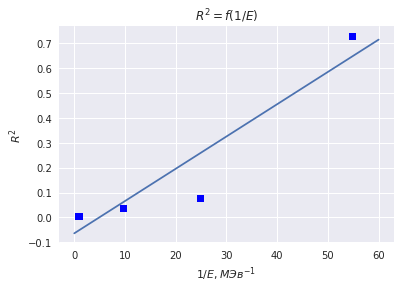

 
0.01299 x - 0.0642


In [21]:
# Связь энергетического разрешения спектрометра и энергии.
X = dat["$1/E, МЭв^{-1}$"].sort_values().astype("float32")
Y = dat["$R^2$"].sort_values().astype("float32")
plt.plot(X, Y, "bs")
p1 = np.poly1d(np.polyfit(X, Y, 1))
a = np.linspace(0, 60, 100)
plt.plot(a, p1(a))
plt.title("$R^2=f(1/E)$")
plt.xlabel("$1/E, МЭв^{-1}$")
plt.ylabel("$R^2$")
plt.show()
print(p1)

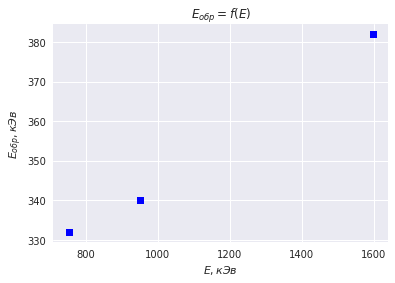

In [22]:
# Зависимость энергии пика обратного рассеяния от энергии.
X = [753, 1598, 951]
Y = [332, 382, 340]
plt.plot(X, Y, "bs")
plt.title("$E_{обр}=f(E)$")
plt.xlabel("$E, кЭв$")
plt.ylabel("$E_{обр}, кЭв$")
plt.show()

0.09817445500799386 МЭв


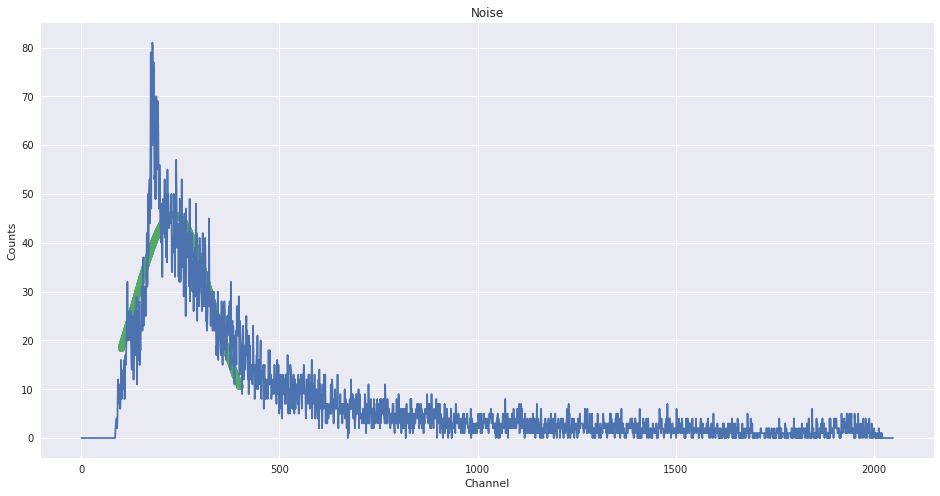

In [28]:
# Нахождение энергии характеристического излучения свинца.
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
fit_plot(data["Noise"], gauss, [100, 400], axes, "Noise", p0=[100, 200, 30])
print(p(232.35708943), "МЭв")